In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
%matplotlib inline

In [6]:
data_dir = ("C:\\Users\\Himanshi Bansal\\Downloads\\archive\\DevanagariHandwrittenCharacterDataset\\DevanagariHandwrittenCharacterDataset")

In [7]:
os.listdir(data_dir)

['Test', 'Train']

In [8]:
train_dir = (data_dir + '//Train')
test_dir = (data_dir + '//Test')

In [9]:
len(os.listdir(train_dir))

46

In [10]:
sample = (train_dir + '/digit_8/' + '/10308.png')

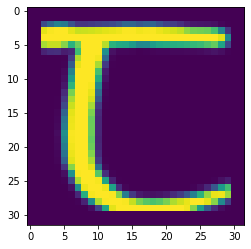

In [11]:
plt.imshow(imread(sample))

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
image_gen = ImageDataGenerator(shear_range=0.1, zoom_range=0.2,horizontal_flip=False,fill_mode= 'nearest', rescale=1/255)

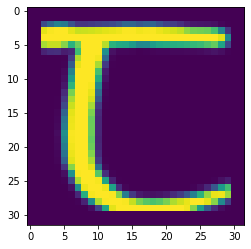

In [14]:
sample_img = (imread(sample))
sample_img = sample_img.reshape(32,32,1)
plt.imshow(sample_img)

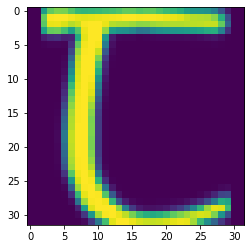

In [15]:
plt.imshow(image_gen.random_transform(sample_img))

In [16]:
train_data = image_gen.flow_from_directory(train_dir, target_size=(32,32), color_mode='grayscale')

Found 78200 images belonging to 46 classes.


In [17]:
test_data = image_gen.flow_from_directory(test_dir, target_size=(32,32), shuffle=False, color_mode = 'grayscale')

Found 13800 images belonging to 46 classes.


In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [31]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,1), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32,32,1), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32,32,1), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(84, activation = 'relu'))

model.add(Dense(46, activation = 'softmax'))

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)          65600     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [35]:
train_data.class_indices

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 

In [36]:
results = model.fit(train_data, epochs = 10, validation_data=(test_data), callbacks=[early_stop])

Epoch 1/10
2444/2444 [==============================] - 111s 45ms/step - loss: 1.2003 - accuracy: 0.6481 - val_loss: 0.3728 - val_accuracy: 0.8854
Epoch 2/10
2444/2444 [==============================] - 125s 51ms/step - loss: 0.4442 - accuracy: 0.8647 - val_loss: 0.2412 - val_accuracy: 0.9241
Epoch 3/10
2444/2444 [==============================] - 104s 42ms/step - loss: 0.3313 - accuracy: 0.8998 - val_loss: 0.2082 - val_accuracy: 0.9364
Epoch 4/10
2444/2444 [==============================] - 104s 43ms/step - loss: 0.2716 - accuracy: 0.9189 - val_loss: 0.1827 - val_accuracy: 0.9441
Epoch 5/10
2444/2444 [==============================] - 104s 43ms/step - loss: 0.2388 - accuracy: 0.9285 - val_loss: 0.1721 - val_accuracy: 0.9495
Epoch 6/10
2444/2444 [==============================] - 109s 45ms/step - loss: 0.2134 - accuracy: 0.9366 - val_loss: 0.1773 - val_accuracy: 0.9472
Epoch 7/10
2444/2444 [==============================] - 114s 47ms/step - loss: 0.1998 - accuracy: 0.9406 - val_loss: 0

In [37]:
metrics = pd.DataFrame(model.history.history)

In [38]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.200324,0.648146,0.372819,0.885435
1,0.444236,0.864731,0.241209,0.924058
2,0.331333,0.899847,0.208158,0.936449
3,0.271613,0.918913,0.182681,0.944058
4,0.238836,0.928529,0.172116,0.949493
5,0.213398,0.936611,0.177307,0.947246
6,0.199836,0.940563,0.153865,0.954565
7,0.181906,0.945026,0.147741,0.958333
8,0.173656,0.948389,0.128809,0.961087
9,0.160735,0.952225,0.123440,0.963841


<AxesSubplot:>

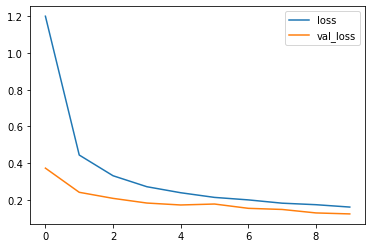

In [39]:
metrics[['loss', 'val_loss']].plot()

In [56]:
sample_test = (test_dir + '\\character_13_daa\\10674.png')

In [57]:
sample_test

'C:\\Users\\Himanshi Bansal\\Downloads\\archive\\DevanagariHandwrittenCharacterDataset\\DevanagariHandwrittenCharacterDataset//Test\\character_13_daa\\10674.png'

In [60]:
sample_test = imread(sample_test)


In [63]:
sample_test.shape

(32, 32)

In [77]:
sample_test_reshaped = sample_test.reshape(32,32,1)

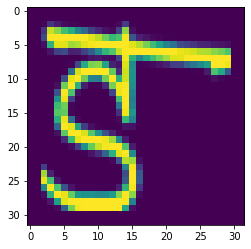

In [78]:
plt.imshow(sample_test_reshaped)

In [79]:
sample_test_reshaped = np.expand_dims(sample_test_reshaped, axis = 0)

In [80]:
sample_test_reshaped.shape

(1, 32, 32, 1)

In [81]:
model.predict_classes(sample_test_reshaped)

array([3], dtype=int64)

In [82]:
from tensorflow.keras.models import load_model

In [83]:
model.save("devnagri_model/h5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: devnagri_model/h5\assets


'C:\\Users\\Himanshi Bansal\\Downloads'